## Analysis1: Distribution of US govt. spendings across different departments and vendors in the states MA and PA

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading into dataframe from saved pickle file

In [3]:
pickle_df = pd.read_pickle('../Extra/us_spending_df.pickle')
pickle_df['DollarsObligated'] = pickle_df['DollarsObligated'].apply(pd.to_numeric)
print('count total rows',pickle_df['DollarsObligated'].count())
pickle_df.head()

count total rows 704610


,AgencyID,AwardType,ContractDescription,ContractPricing,ContractingAgency,ContractingAgencyCode,DUNSNumber,DateSigned,DollarsObligated,ExtentCompeted,...,RecipientName,RecipientOrContractorName,RecipientState,RecipientZipCode,TransactionNumber,TransactionStatus,TypeofSpending,TypeofTransaction,UniqueTransactionID,VendorName
2016_MA_0_1,9700: DEPT OF DEFENSE,1,FMS AND US AEGIS PRODUCTION (FCS AND SPY TRANS...,Y,1700: DEPT OF THE NAVY,1700,193049236,2016-05-27T00:00:00.000,365848800.0,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01752,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_2,9700: DEPT OF DEFENSE,1,MODERNIZATION OF SIX PATRIOT FIRE UNITS FOR TH...,Y,2100: DEPT OF THE ARMY,2100,196882310,2016-06-23T00:00:00.000,256459280.0,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01810,2,F,C,F,2,RAYTHEON COMPANY
2016_MA_0_3,9700: DEPT OF DEFENSE,1,DDG 1002 MSE,Y,1700: DEPT OF THE NAVY,1700,184724797,2015-12-31T00:00:00.000,255281700.0,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_4,9700: DEPT OF DEFENSE,1,QATAR ADOC CONTRACT #2 UCA DEFINITIZATION,Y,5700: DEPT OF THE AIR FORCE,5700,184724797,2015-10-16T00:00:00.000,142685024.0,B,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,14,F,C,F,14,RAYTHEON COMPANY
2016_MA_0_5,9700: DEPT OF DEFENSE,1,ADDITIONAL F414 FY15 ENGINES,N,1700: DEPT OF THE NAVY,1700,001408509,2015-12-30T00:00:00.000,121208608.0,C,...,GENERAL ELECTRIC COMPANY,GENERAL ELECTRIC COMPANY,MA,01905,0,F,C,F,0,GENERAL ELECTRIC COMPANY


### Part 1: Distribution of spending across Govt. Departments

#### (i)Grouping the data by State and Agency(department) respectively.

In [4]:
grouped = pickle_df.groupby(['PlaceofPerformanceState', 'AgencyID']).agg({'DollarsObligated':sum,'DateSigned':len})
grouped = grouped.rename(index=str,columns={'DateSigned':'Contracts Count'})
grouped.head()

DollarsObligated  \
PlaceofPerformanceState AgencyID                                                              
MA: Massachusetts       1145: PEACE CORPS                                          6536.490   
                        1153: UNITED STATES TRADE AND DEVELOPMENT AGENCY        1819404.780   
                        1205: USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER        143711.890   
                        12C2: FOREST SERVICE                                     620618.649   
                        12C3: NATURAL RESOURCES CONSERVATION SERVICE            1150542.619   

                                                                           Contracts Count  
PlaceofPerformanceState AgencyID                                                            
MA: Massachusetts       1145: PEACE CORPS                                                1  
                        1153: UNITED STATES TRADE AND DEVELOPMENT AGENCY                16  
                        1205: USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER                4  
                        12C2: FOREST SERVICE                                            40  
                        12C3: NATURAL RESOURCES CONSERVATION SERVICE                    22

In [5]:
grouped = grouped.reset_index()
grouped.head()

,PlaceofPerformanceState,AgencyID,DollarsObligated,Contracts Count
0,MA: Massachusetts,1145: PEACE CORPS,6536.490,1
1,MA: Massachusetts,1153: UNITED STATES TRADE AND DEVELOPMENT AGENCY,1819404.780,16
2,MA: Massachusetts,"1205: USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER",143711.890,4
3,MA: Massachusetts,12C2: FOREST SERVICE,620618.649,40
4,MA: Massachusetts,12C3: NATURAL RESOURCES CONSERVATION SERVICE,1150542.619,22


#### (ii)Splitting the State Code and Agency Code from column headers, removing the redundant State column and grouping again by State.

In [6]:
grouped['AgencyIDCode'] = grouped['AgencyID'].apply(lambda x:x[:4])
grouped['StateCode'] = grouped['PlaceofPerformanceState'].apply(lambda x:x[:2])
del grouped['PlaceofPerformanceState']
grouped = grouped.groupby('StateCode')
grouped.head()

,AgencyID,DollarsObligated,Contracts Count,AgencyIDCode,StateCode
0,1145: PEACE CORPS,6536.490,1,1145,MA
1,1153: UNITED STATES TRADE AND DEVELOPMENT AGENCY,1819404.780,16,1153,MA
2,"1205: USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER",143711.890,4,1205,MA
3,12C2: FOREST SERVICE,620618.649,40,12C2,MA
4,12C3: NATURAL RESOURCES CONSERVATION SERVICE,1150542.619,22,12C3,MA
116,"0559: GAO, EXCEPT COMPTROLLER GENERAL",0.000,1,0559,PA
117,1100: EXECUTIVE OFFICE OF THE PRESIDENT,80700.000,1,1100,PA
118,1145: PEACE CORPS,103685.590,7,1145,PA
119,1204: OFFICE OF INSPECTOR GENERAL,4038.220,2,1204,PA
120,"1205: USDA, OFFICE OF THE CHIEF FINANCIAL OFFICER",93147.400,6,1205,PA


#### (iii)Plotting bar plot to show distribution of govt. spending across top 5 departments (AgencyID) in states MA and PA.

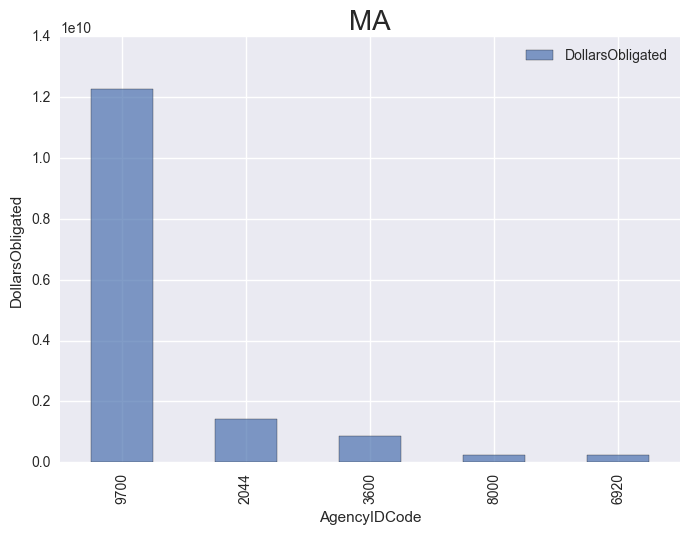

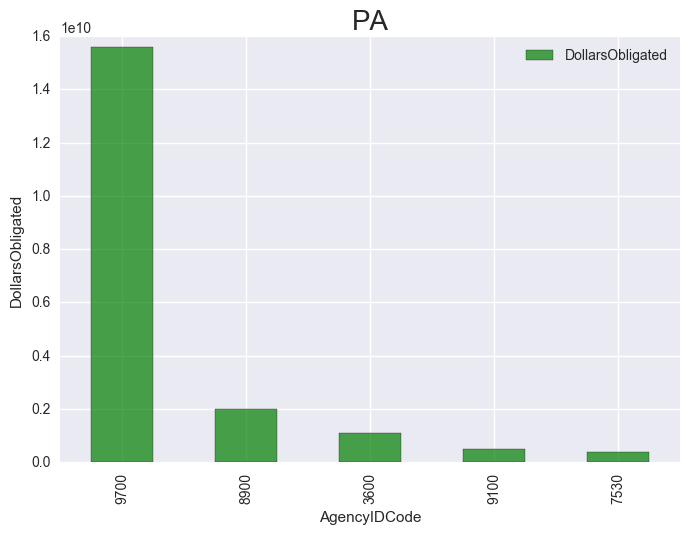

In [12]:
color_counter = 0
for name, group in grouped:
    sorted_group = group.sort_values('DollarsObligated', ascending = False)
    if color_counter:
        sorted_group.head().plot(x='AgencyIDCode', y='DollarsObligated', kind = 'bar', alpha = 0.7, color = 'g')
    else:
        sorted_group.head().plot(x='AgencyIDCode', y='DollarsObligated', kind = 'bar', alpha = 0.7)
    plt.title(name, fontsize=20)
    plt.ylabel('DollarsObligated')
    plt.savefig('Analysis1/DeptDistributionPlot_{}.png'.format(name))
    color_counter = color_counter + 1

#### (iv)Getting rid of Defense agency (9700), which has maximum funding from the govt., in order to take better look at other channels of US spendings

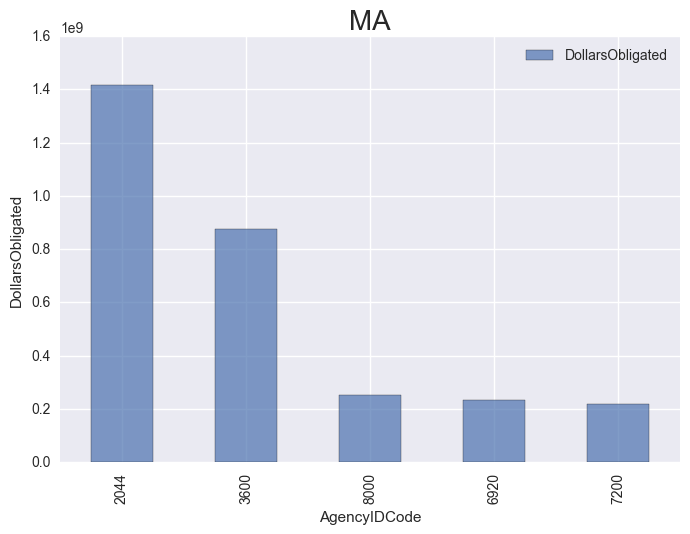

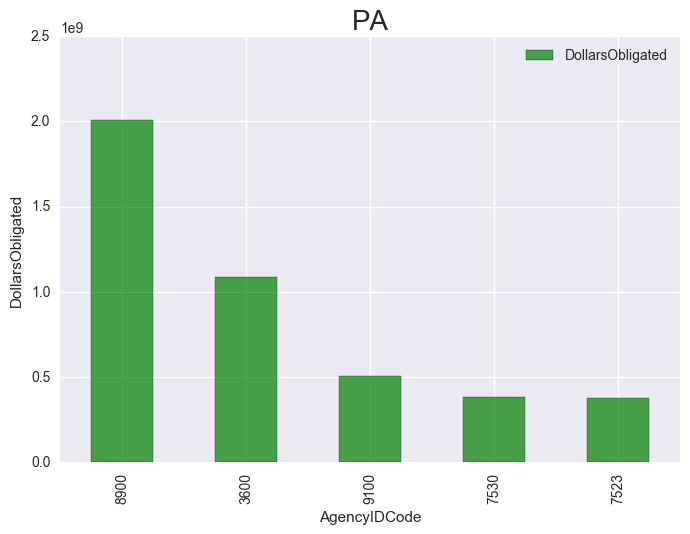

In [13]:
color_counter_vendor = 0
for name, group in grouped:
    group = group[group['AgencyIDCode']!= '9700']
    sorted_group = group.sort_values('DollarsObligated', ascending = False)
    if color_counter_vendor:
        sorted_group.head().plot(x='AgencyIDCode', y='DollarsObligated', kind = 'bar', alpha = 0.7, color='g')
    else:
        sorted_group.head().plot(x='AgencyIDCode', y='DollarsObligated', kind = 'bar', alpha = 0.7)
    plt.title(name, fontsize=20)
    plt.ylabel('DollarsObligated')
    plt.savefig('Analysis1/DeptDistributionPlot_{}.png'.format(name))
    color_counter_vendor = color_counter_vendor + 1

### Conclusion:
Apart from Dept of Defense(9700) which comes out to be the major expense of the US govt. in both the states, the next most expensive channels turn out to be:<br>
#### State - MA<br>
1.United States Mint(2044): Responsible for circulating coinage for US.<br>
2.Dept of Veterans Affair(3600): This is a govt-run military veteran benfit system.<br>
3.NASA(8000)<br>
4.Federal Aviation Administration(6920)<br>
5.Agency for International Development(7200): Responsible for administering civilian foreign aid.<br><br>

#### State - PA<br>
1.Dept of Energy(8900): This dept concerns with the US's policies regarding energy and safety in handling nuclear material.<br>
2.Dept of Veterans Affair(3600): This is a govt-run military veteran benfit system.<br>
3.Dept of Education(9100)<br>
4.Centers for Medicare and Medicaid Services(7530): Federal agency that administers the Medicare program and works in partnership with state governments to administer Medicaid, the State Children's Health Insurance Program (SCHIP), and health insurance portability standards.<br>
5.Centers for Disease Control and Prevention(7523): Responsible for protecting public health and safety through the control and prevention of disease, injury, and disability in the US and internationally.


### Part 2: Distribution of spending across Vendors

#### (i)Grouping the data by State and Recipient Company (which is the firm that recieves contract from the US govt. for providing service) 

In [9]:
pickle_df['ParentRecipientOrCompanyName'] = pickle_df['ParentRecipientOrCompanyName'].str.upper()
groupbyvendor = pickle_df.groupby(['PlaceofPerformanceState','ParentRecipientOrCompanyName']).agg({'DollarsObligated':sum, 'DateSigned':len})
groupbyvendor = groupbyvendor.rename(index=str,columns={'DateSigned':'Contracts Count'})
groupbyvendor = groupbyvendor.reset_index()
groupbyvendor['StateCode'] = groupbyvendor['PlaceofPerformanceState'].apply(lambda x:x[:2])

#### (ii)Plotting bar plot to show distribution of govt. spending across top 5 vendors (ParentRecipientOrCompanyName) in states MA and PA.

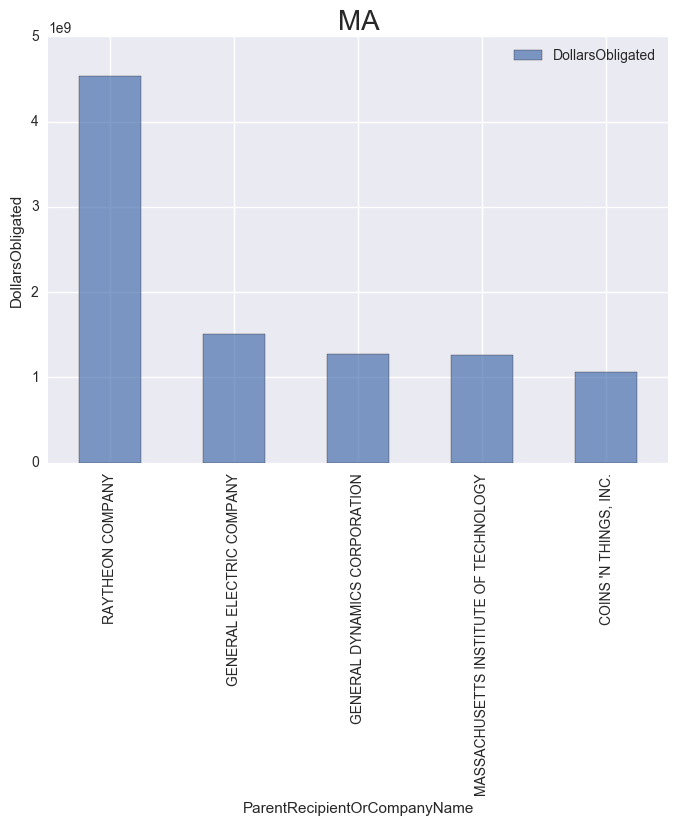

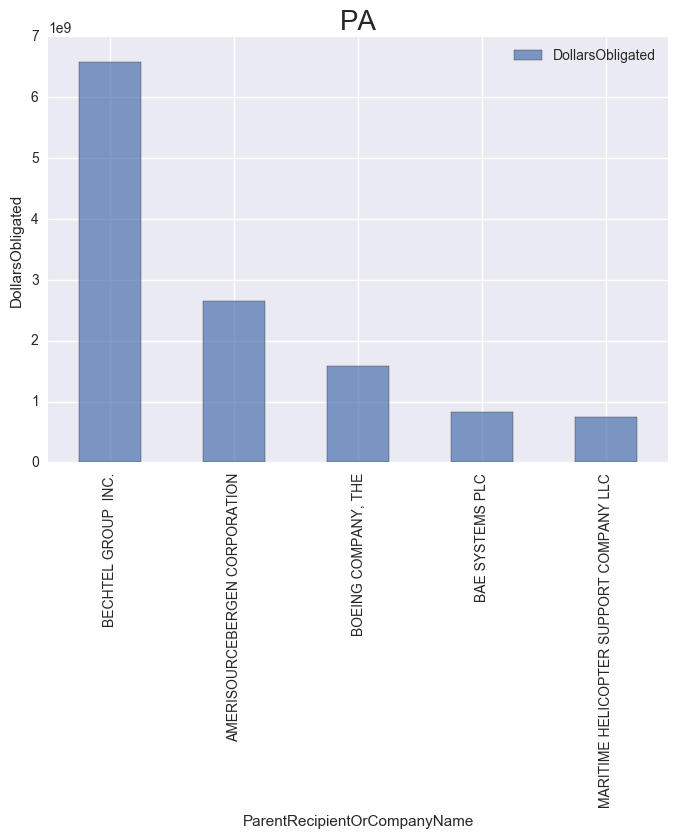

In [10]:
groupbystate = groupbyvendor.groupby('StateCode')
for name,group in groupbystate:
    groupx = group.sort_values('DollarsObligated', ascending = False)
    groupx.head().plot(x='ParentRecipientOrCompanyName', y='DollarsObligated', kind = 'bar', alpha = 0.7)
    plt.title(name, fontsize=20)
    plt.ylabel('DollarsObligated')
    plt.savefig('Analysis1/VendorDistributionPlot_{}.png'.format(name))

### Conclusion:
In MA, Raytheon(for defense) and GE(for energy) turn out to be the major vendors. Next comes the education sector where MIT turns out to be the major vendor in providing ivy league education in MA. <br>
In PA, Bechtel Group Inc(largest construction and civil engineering company in the United States) emerges as the vendor with maximum contracts. Amerisourcebergen Corp.(world's largest pharmaceutical sourcing and distribution services companies) comes next, followed by Boeing(manufacturing rockets, aircrafts and satellites worldwide).